In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('DOP/5a_40A.csv')
training_set = dataset_train.iloc[2:1271,0:1].values

In [3]:
training_set = training_set.reshape(-1,1)
training_set.shape

(1269, 1)

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
X_train = []
y_train = []
for i in range (60, 1269):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [6]:
X_train.shape

(1209, 60, 1)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [8]:
regressor = Sequential()

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(Dense(units = 1))

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
y_train.shape

(1209,)

In [32]:
regressor.fit(X_train, y_train, epochs = 1, batch_size = 32)

38/38 [==============================] - 2s 41ms/step - loss: 0.0807


In [33]:
dataset_test = pd.read_csv('DOP/5a_40A.csv')
testing_set = dataset_test.iloc[1272:1587,0:1].values

In [34]:
dataset_total = pd.concat((dataset_train['Hours'],dataset_test['Hours']), axis = 0)

In [35]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)- 60: ].values


In [36]:
inputs = inputs.reshape(-1, 1)

In [37]:
inputs = sc.transform(inputs)

In [38]:
X_test = []
for i in range(60, len(inputs)): 
    X_test.append(inputs[i-60: i, 0])
X_test = np.array(X_test)
    #make numpy array as 3D , adding num of indicator
X_test = np.reshape(X_test, newshape = (X_test.shape[0], X_test.shape[1], 1))

In [39]:
predicktion = regressor.predict(X_test)

50/50 [==============================] - 1s 14ms/step


In [40]:
array=np.array(predicktion)
reshaped_array=np.reshape(predicktion,(1587,60))
print("Original array:\n", predicktion)
print("Reshaped array:\n", reshaped_array)

Original array:
 [[[0.11262135]
  [0.19220822]
  [0.2698117 ]
  ...
  [0.5193099 ]
  [0.5193121 ]
  [0.51931435]]

 [[0.11262786]
  [0.19222713]
  [0.26984483]
  ...
  [0.51930606]
  [0.51930976]
  [0.5184112 ]]

 [[0.11262786]
  [0.19222713]
  [0.26984483]
  ...
  [0.51930374]
  [0.51840657]
  [0.5156615 ]]

 ...

 [[0.11262135]
  [0.1922022 ]
  [0.26978895]
  ...
  [0.5193297 ]
  [0.51932895]
  [0.5193263 ]]

 [[0.11262135]
  [0.1922022 ]
  [0.26978895]
  ...
  [0.51932293]
  [0.51932174]
  [0.5193205 ]]

 [[0.11262135]
  [0.19220218]
  [0.26979446]
  ...
  [0.51931566]
  [0.51931584]
  [0.5193167 ]]]
Reshaped array:
 [[0.11262135 0.19220822 0.2698117  ... 0.5193099  0.5193121  0.51931435]
 [0.11262786 0.19222713 0.26984483 ... 0.51930606 0.51930976 0.5184112 ]
 [0.11262786 0.19222713 0.26984483 ... 0.51930374 0.51840657 0.5156615 ]
 ...
 [0.11262135 0.1922022  0.26978895 ... 0.5193297  0.51932895 0.5193263 ]
 [0.11262135 0.1922022  0.26978895 ... 0.51932293 0.51932174 0.5193205 ]
 [

In [41]:
preeeeeedicktion = sc.inverse_transform(reshaped_array)


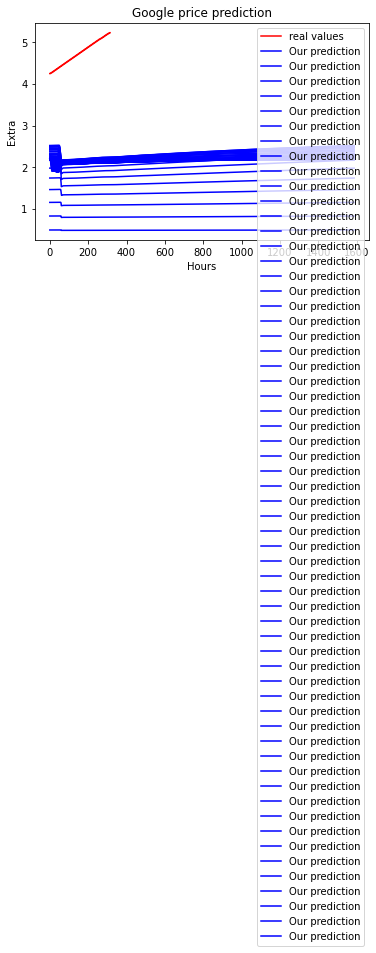

In [42]:
plt.plot(testing_set, color = 'red', label = 'real values')
plt.plot(preeeeeedicktion, color = 'blue', label = 'Our prediction')
plt.title('Google price prediction')
plt.xlabel('Hours')
plt.ylabel('Extra')
plt.legend()
plt.show()